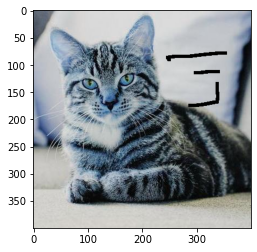

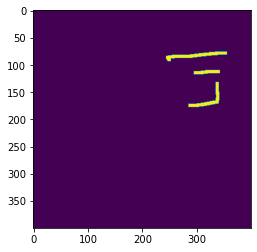

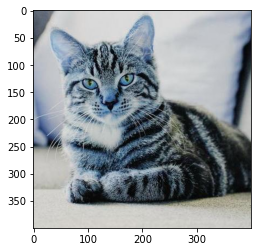

In [2]:
#1.Image Restoration
#a.Restore a damaged image
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Open the image
img=cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()

#Load the mask
mask=cv2.imread('dimage_mask.png',0)
plt.imshow(mask)
plt.show()

#Inpaint
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

#Write the ouput
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

In [15]:
#b.Removing Logo's
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [33]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
    

In [17]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

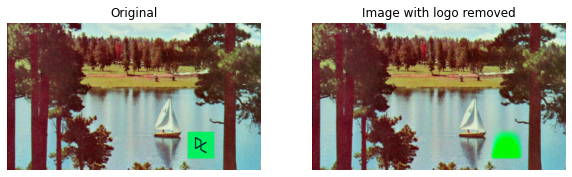

In [18]:
image_with_logo=plt.imread('imlogo.png')

#Initialize the mask
mask=np.zeros(image_with_logo.shape[:-1])

#Set the pixels where the Logo is to 1
mask[210:272,360:425]=1

#Apply inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                              mask,
                                              multichannel=True)

#Show the original and logo removed images
plot_comparison(image_with_logo,image_logo_removed,'Image with logo removed')

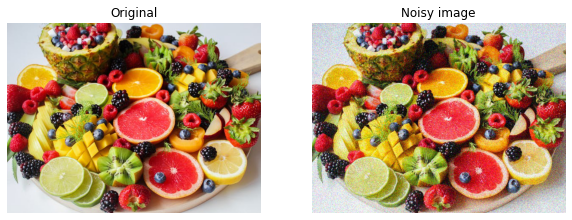

In [26]:
#2.Noise
#a.Adding Noise

from skimage.util import random_noise

fruit_image=plt.imread('fruitts.jpeg')
                       
#add noise to the image
noisy_image=random_noise(fruit_image)
                       
#show the original and resulting image
plot_comparison(fruit_image,noisy_image,'Noisy image')

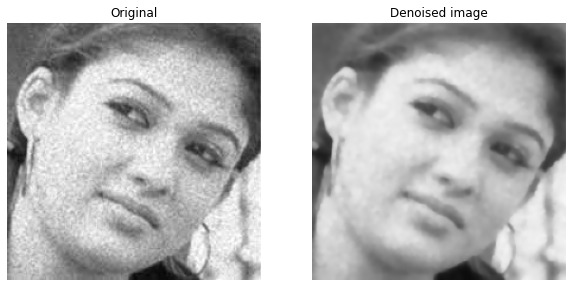

In [28]:
#b.Reducing noise

from skimage.restoration import denoise_tv_chambolle

noisy_image=plt.imread('noisy.jpg')
                       
#add total varation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)
                       
#show the noisy and denoised image
plot_comparison(noisy_image,denoised_image,'Denoised image')

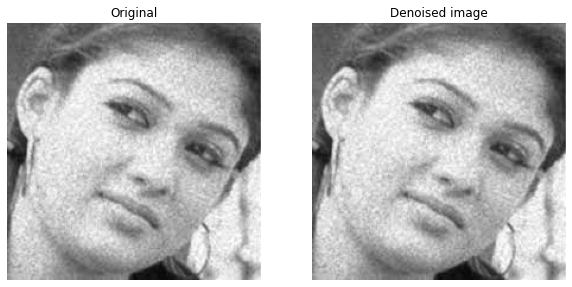

In [29]:
#c.Reducing Noise While Preserving edges
from skimage.restoration import denoise_bilateral

landscape_image=plt.imread('noisy.jpg')
                       
#apply bilateral filter denoising
denoised_image=denoise_bilateral(landscape_image,multichannel=True)
                       
#show the original and resulting images
plot_comparison(landscape_image,denoised_image,'Denoised image')

C:\Users\USERPC\AppData\Local\Temp/ipykernel_6552/3866153857.py:24: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
C:\Users\USERPC\AppData\Local\Temp/ipykernel_6552/3866153857.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


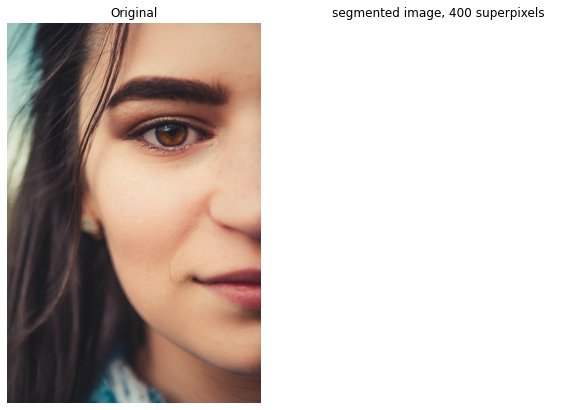

In [47]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
#3.Segmentation
#a.Superpixel Segmentation

from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')
                       
#obtain the segmentation with 400 regions
segments=slic(face_image,n_segments=400)
                       
#put segments on top of original image to compare
segmented_image=label2rgb(segments,face_image,kind='avg')

#show the segmented image
plot_comparison(face_image,segmented_image,'segmented image, 400 superpixels')


In [45]:
#4.Contours:
#a.Contouring shapes

def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

ValueError: x and y must have same first dimension, but have shapes (2645,) and (0, 2)

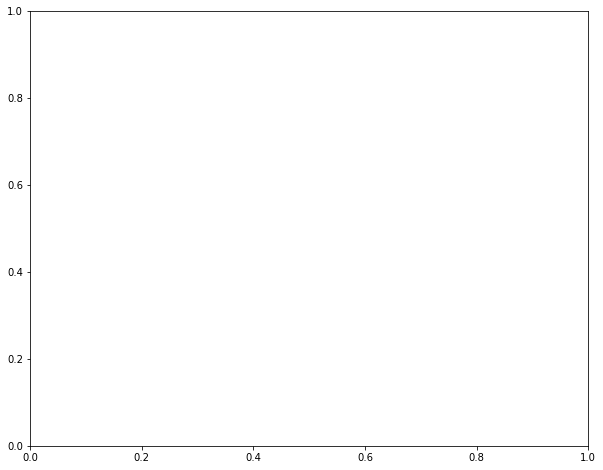

In [43]:
from skimage import measure,data

#obtain the horse image
horse_image=data.horse()

#find the contours with a constant level value of0.8
contours=measure.find_contours(horse_image,level=0.8)

#shows the image with contours found
show_image_contour(horse_image,contours)